# Import Packages

In [16]:
import numpy as np
import pandas as pd 
from keras import utils, models, layers, preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate Two Time Series of Variable Length

In [2]:
n_series_per_class = 1000

In [3]:
# generate list of random walks from absulute normal distribution
ts1 = []
l1 = np.repeat(0,n_series_per_class)

for i in range(n_series_per_class):
    ts1.append(np.cumsum(abs(np.random.normal(size=np.random.randint(low=100, high=250)))))


In [4]:
# generate list of random walks from poisson distribution
ts2 = []
l2 = np.repeat(1,n_series_per_class)

for i in range(n_series_per_class):
    ts2.append(np.cumsum(np.random.poisson(size=np.random.randint(low=100, high=250))))



In [5]:
X = np.append(ts1,ts2)
Y = np.append(l1,l2)

In [6]:
# delete variables
del ts1, l1, ts2, l2

# Prepare Data

In [7]:
# Pads time series to the same length
X = preprocessing.sequence.pad_sequences(X, value=-100)

In [8]:
# train-test-split
x_train, x_test, y_train, y_test = train_test_split(
     X, Y, test_size=0.2, random_state=42)


In [9]:
# reshape arrays
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# transform numerical to categorical values
y_train = utils.to_categorical(y_train, 2) 
y_test = utils.to_categorical(y_test, 2) 

In [10]:
del X, Y

# LSTM Model

In [11]:
model = models.Sequential()
# Masking layer to ignore padding values
model.add(layers.Masking(mask_value=-100,input_shape=(x_train.shape[1],1)))
model.add(layers.LSTM(32))
model.add(layers.Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, 249, 1)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 4,418
Trainable params: 4,418
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(x_train,y_train, epochs=50, batch_size=32, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 1280 samples, validate on 320 samples
Epoch 1/50
1280/1280 [==============================] - 3s 3ms/step - loss: 0.6960 - accuracy: 0.5164 - val_loss: 0.6870 - val_accuracy: 0.5969
Epoch 2/50
1280/1280 [==============================] - 3s 2ms/step - loss: 0.6779 - accuracy: 0.6211 - val_loss: 0.6765 - val_accuracy: 0.6156
Epoch 3/50
1280/1280 [==============================] - 3s 2ms/step - loss: 0.6665 - accuracy: 0.6125 - val_loss: 0.6713 - val_accuracy: 0.5906
Epoch 4/50
1280/1280 [==============================] - 3s 2ms/step - loss: 0.6655 - accuracy: 0.6203 - val_loss: 0.6635 - val_accuracy: 0.5938
Epoch 5/50
1280/1280 [==============================] - 3s 2ms/step - loss: 0.6541 - accuracy: 0.6250 - val_loss: 0.6601 - val_accuracy: 0.6187
Epoch 6/50
1280/1280 [==============================] - 3s 2ms/step - loss: 0.6407 - accuracy: 0.6266 - val_loss: 0.6516 - val_accuracy: 0.6250
Epoch 7/50
1280/1280 [===================

In [13]:
model.evaluate(x_test,y_test)

400/400 [==============================] - 0s 636us/step


[0.19621856451034547, 0.925000011920929]

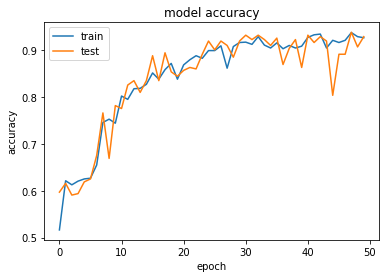

In [14]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


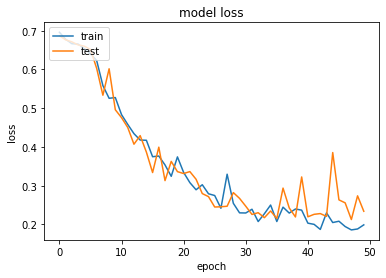

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()